In [1]:
import rpy2.ipython
%load_ext rpy2.ipython
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

In [2]:
%%R
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In addition: Warning messages:
1: package ‘ggplot2’ was built under R version 4.4.3 
2: package ‘tibble’ was built under R version 4.4.3 
3: package ‘purrr’ was built under R version 4.4.3 


In [6]:
%%R 
library(tidyverse)

embed.df <- read_tsv("results/embed_df.txt") %>% select (-X1)
dim(embed.df)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  `HCC1806-PAR-1` = col_double(),
  `HCC1806-PAR-2` = col_double(),
  `MDA-PAR-1` = col_double(),
  `MDA-PAR-2` = col_double(),
  `MCF7-1` = col_double(),
  `MCF7-2` = col_double(),
  `MDA-MD-453-1` = col_double(),
  `MDA-MD-453-2` = col_double(),
  `HCC38-1` = col_double(),
  `HCC38-2` = col_double(),
  `ZR-75-1` = col_double(),
  `ZR-75-2` = col_double()
)

[1] 50 12


In [7]:
%%R 
#perform pca and plot
pca <- prcomp(embed.df, center = TRUE, scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6    PC7
Standard deviation     1.6572 1.1784 1.1374 1.0955 1.04710 1.00192 0.9334
Proportion of Variance 0.2289 0.1157 0.1078 0.1000 0.09137 0.08365 0.0726
Cumulative Proportion  0.2289 0.3446 0.4524 0.5524 0.64377 0.72742 0.8000
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.87582 0.83335 0.72687 0.63573 0.07617
Proportion of Variance 0.06392 0.05787 0.04403 0.03368 0.00048
Cumulative Proportion  0.86394 0.92181 0.96584 0.99952 1.00000


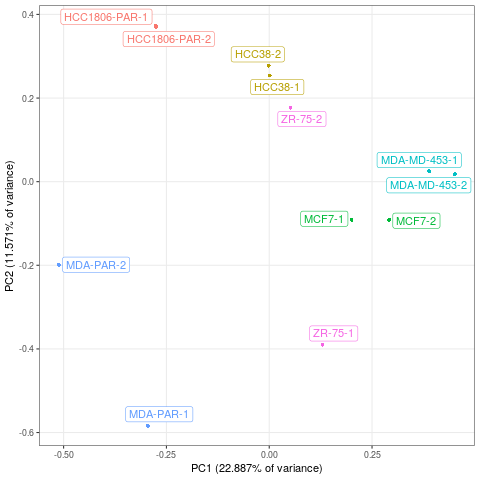

In [31]:
%%R
library(ggrepel)
#plot pca
rotation.pca <- as.data.frame(pca$rotation)
rotation.pca["type"] <- gsub("-\\d+", "", rownames(rotation.pca))
var.pca <- summary(pca)$importance[2,]
plt <- ggplot(rotation.pca, aes(PC1, PC2, color=type)) + geom_point(shape = 16) +
    geom_label_repel(aes(label=rownames(rotation.pca))) +
    xlab(paste0("PC1 (", var.pca[1]*100,"% of variance)")) +
    ylab(paste0("PC2 (", var.pca[2]*100,"% of variance)")) +
    theme_bw() + theme(legend.position="none", panel.grid.minor = element_blank())
ggsave("results/embed_df_pca.pdf", width=4, height=4)
plt

In [51]:
%%R
#full data
exp.df <- read_tsv('data/BRCA_SLAM_gs_TPM.selected.txt') %>% select (-GENE)
dim(exp.df)


── Column specification ────────────────────────────────────────────────────────
cols(
  GENE = col_character(),
  `HCC1806-PAR-1` = col_double(),
  `HCC1806-PAR-2` = col_double(),
  `MDA-PAR-1` = col_double(),
  `MDA-PAR-2` = col_double(),
  `MCF7-1` = col_double(),
  `MCF7-2` = col_double(),
  `MDA-MD-453-1` = col_double(),
  `MDA-MD-453-2` = col_double(),
  `HCC38-1` = col_double(),
  `HCC38-2` = col_double(),
  `ZR-75-1` = col_double(),
  `ZR-75-2` = col_double()
)
[1] 56517    12


R[write to console]: corrplot 0.88 loaded



              HCC1806-PAR-1 HCC1806-PAR-2 MDA-PAR-1 MDA-PAR-2    MCF7-1
HCC1806-PAR-1     1.0000000     0.9956455 0.9938320 0.9936055 0.5360518
HCC1806-PAR-2     0.9956455     1.0000000 0.9847263 0.9912838 0.5735235
MDA-PAR-1         0.9938320     0.9847263 1.0000000 0.9967799 0.5037817
MDA-PAR-2         0.9936055     0.9912838 0.9967799 1.0000000 0.5208808
MCF7-1            0.5360518     0.5735235 0.5037817 0.5208808 1.0000000
MCF7-2            0.5783206     0.6145196 0.5462636 0.5629790 0.9983144
MDA-MD-453-1      0.7139614     0.7364783 0.6920967 0.6997421 0.9647667
MDA-MD-453-2      0.7235669     0.7490714 0.7004322 0.7114178 0.9640278
HCC38-1           0.7030466     0.7339438 0.6760419 0.6908656 0.9731855
HCC38-2           0.4993329     0.5381636 0.4670251 0.4847810 0.9946731
ZR-75-1           0.9628749     0.9683900 0.9636649 0.9704470 0.6284487
ZR-75-2           0.9392116     0.9500695 0.9349405 0.9413152 0.7415886
                 MCF7-2 MDA-MD-453-1 MDA-MD-453-2   HCC38-1   HC

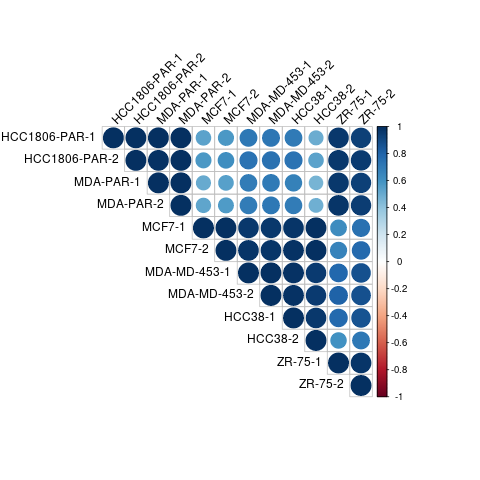

In [54]:
%%R
#create a corr plot
library(corrplot)
plt <- corrplot(cor(exp.df), method="circle", type="upper", tl.col="black", tl.srt=45)
ggsave("results/exp_df_corr.pdf", width=4, height=4)
plt

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



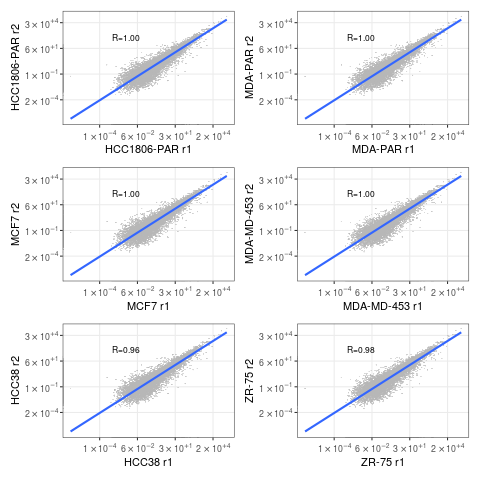

In [109]:
%%R
library(ggrastr)
fancy_scientific <- function(l) {
     # turn in to character string in scientific notation
     l <- sprintf("%.0e", l)
     l <- format(l, scientific = TRUE)
     # quote the part before the exponent to keep all the digits
     l <- gsub("^(.*)e", "'\\1'e", l)
     # turn the 'e+' into plotmath format
     l <- gsub("e", "%*%10^", l)
     # return this as an expression
     parse(text=l)
}
#draw scatter plots for replicates
scatter_plots <- list()
types <- unique(gsub("-\\d+$", "", colnames(exp.df)))
for (type in types){
    type.df <- as.data.frame(exp.df %>% select(contains(type)))
    s <- cor.test(type.df[,1], type.df[,2])
    stat <- sprintf("R=%.2f", s$estimate)
    scatter_plots[[type]] <- ggplot(type.df, aes(x=type.df[,1], y=type.df[,2])) + geom_point_rast(color="#B7B7B7", alpha=0.5) +
        geom_smooth(method=lm,level=0.9999999, size=1) +
        xlab(paste0(type, " r1")) + ylab(paste0(type, " r2")) +
        annotate("text", x=0.01, y=1000, label=stat, size=3) +
        scale_x_continuous(labels=fancy_scientific, trans='log2') +
        scale_y_continuous(labels=fancy_scientific, trans='log2') +
        theme_bw() + theme(legend.position="none", panel.grid.minor = element_blank())
}
#merge list of plots
library(patchwork)

plt <-  wrap_plots(scatter_plots, ncol=2)
ggsave(filename = "results/exp_df_scatter.pdf", plot = plt, device = "pdf", width = 4.75, height = 6)
plt

In [52]:
%%R
#pca
pca <- prcomp(exp.df, center = TRUE, scale. = TRUE)
summary(pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     3.146 1.4126 0.2244 0.15079 0.12125 0.09197 0.06842
Proportion of Variance 0.825 0.1663 0.0042 0.00189 0.00123 0.00070 0.00039
Cumulative Proportion  0.825 0.9912 0.9954 0.99734 0.99856 0.99927 0.99966
                           PC8     PC9    PC10    PC11     PC12
Standard deviation     0.04440 0.04047 0.01707 0.01167 0.009964
Proportion of Variance 0.00016 0.00014 0.00002 0.00001 0.000010
Cumulative Proportion  0.99982 0.99996 0.99998 0.99999 1.000000


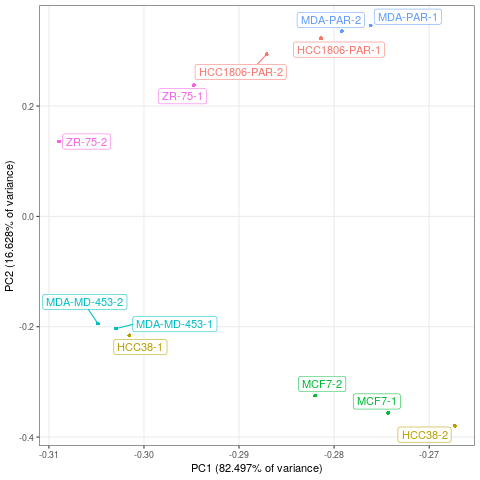

In [53]:
%%R
library(ggrepel)
#plot pca
rotation.pca <- as.data.frame(pca$rotation)
rotation.pca["type"] <- gsub("-\\d+", "", rownames(rotation.pca))
var.pca <- summary(pca)$importance[2,]
plt <- ggplot(rotation.pca, aes(PC1, PC2, color=type)) + geom_point(shape = 16) +
    geom_label_repel(aes(label=rownames(rotation.pca))) +
    xlab(paste0("PC1 (", var.pca[1]*100,"% of variance)")) +
    ylab(paste0("PC2 (", var.pca[2]*100,"% of variance)")) +
    theme_bw() + theme(legend.position="none", panel.grid.minor = element_blank())
ggsave("results/exp_df_pca.pdf", width=4, height=4)
plt

## Stability

In [3]:
%%R
stab.df <- read_tsv('../02102021_BRCA_SLAM-seq/BRCA-lines_log10_decay_rates_gs_mean.txt') %>% select (-...1)
dim(stab.df)

New names:
• `` -> `...1`
Rows: 9328 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ...1
dbl (6): HCC1806.PAR, MDA.PAR, MCF7, MDA.MD.453, HCC38, ZR.75

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] 9328    6


In [4]:
%%R
library(corrplot)
corr_matrix <- cor(stab.df)
corr_matrix

            HCC1806.PAR   MDA.PAR      MCF7 MDA.MD.453     HCC38     ZR.75
   1.0000000 0.6377501 0.5953767  0.5541897 0.5989907 0.5508330
   0.6377501 1.0000000 0.5886845  0.5685758 0.6330863 0.5739955
   0.5953767 0.5886845 1.0000000  0.5955085 0.6048824 0.5778626
   0.5541897 0.5685758 0.5955085  1.0000000 0.5898179 0.5900734
   0.5989907 0.6330863 0.6048824  0.5898179 1.0000000 0.5717206
   0.5508330 0.5739955 0.5778626  0.5900734 0.5717206 1.0000000


corrplot 0.95 loaded


In [5]:
%%R
lower_tri <- corr_matrix[lower.tri(corr_matrix)]
mean(lower_tri)

[1] 0.5887565


In [6]:
%%R
# Load stability data with replicates for ANOVA
stab.rep.df <- read_tsv('data/BRCA-lines_log10_decay_rates_gs.txt')

# Load mean stability data for heatmap visualization
stab.mean.df <- read_tsv('../02102021_BRCA_SLAM-seq/BRCA-lines_log10_decay_rates_gs_mean.txt')

# Define cell line subtypes
# Based on the notebook:
# TNBC: HCC1806.PAR, MDA.PAR, HCC38
# Luminal: MCF7, ZR.75
# Her2: MDA.MD.453
cell_subtypes <- c("TNBC", "TNBC", "Luminal", "Her2", "TNBC", "Luminal")
names(cell_subtypes) <- c("HCC1806.PAR", "MDA.PAR", "MCF7", "MDA.MD.453", "HCC38", "ZR.75")

# Create mapping of subtypes for each replicate column in the replicate dataset
rep_subtypes <- c()
rep_column_names <- colnames(stab.rep.df)[-1]  # Exclude first column (gene names)

for (col in rep_column_names) {
  # Extract cell line name without replicate number 
  # (e.g., "HCC1806.PAR.1" -> "HCC1806.PAR")
  cell_line <- gsub("\\.[0-9]+$", "", col)
  rep_subtypes[col] <- cell_subtypes[cell_line]
}

# Perform ANOVA for each gene using the replicate data for more statistical power
results <- list()
for (gene in stab.rep.df$...1) {
  # Extract gene data
  gene_row <- stab.rep.df[stab.rep.df$...1 == gene, ]
  
  if (nrow(gene_row) == 0) next
  
  # Create a data frame for ANOVA
  values <- as.numeric(gene_row[, -1])
  subtypes <- rep_subtypes[names(gene_row)[-1]]
  
  # Create data frame with values and their corresponding subtypes
  anova_data <- data.frame(
    value = values,
    subtype = subtypes
  )
  
  # Remove any NA values
  anova_data <- anova_data[!is.na(anova_data$value), ]
  
  # Only perform ANOVA if we have enough data
  if (nrow(anova_data) > 0) {
    # Perform one-way ANOVA
    aov_result <- aov(value ~ subtype, data = anova_data)
    # Store p-value
    results[[gene]] <- summary(aov_result)[[1]][["Pr(>F)"]][1]
  }
}

New names:
• `` -> `...1`
Rows: 8789 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (12): HCC1806.PAR.1, HCC1806.PAR.2, MDA.PAR.1, MDA.PAR.2, MCF7.1, MCF7.2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 9328 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): ...1
dbl (6): HCC1806.PAR, MDA.PAR, MCF7, MDA.MD.453, HCC38, ZR.75

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [36]:
%%R
library(pheatmap)
library(viridis)

# Convert to vector and adjust for multiple testing
p_values <- unlist(results)
adj_p <- p.adjust(p_values, method="BH")  # Benjamini-Hochberg adjustment

# Create data frame of results
results_df <- tibble(
  gene = names(adj_p),
  p_value = p_values,
  adj_p_value = adj_p
)

# Filter for significant genes (adjusted p-value < 0.01)
sig_genes <- results_df %>% 
  filter(adj_p_value < 0.01) %>% 
  arrange(adj_p_value) %>%
  pull(gene)

# Create ordered list of columns grouped by subtype for heatmap
ordered_columns <- c(
  names(cell_subtypes[cell_subtypes == "TNBC"]),    # All TNBC columns
  names(cell_subtypes[cell_subtypes == "Luminal"]), # All Luminal columns  
  names(cell_subtypes[cell_subtypes == "Her2"])     # All Her2 columns
)

# Create a data frame for column annotation (in the new order)
column_anno <- data.frame(
  Subtype = cell_subtypes[ordered_columns],
  row.names = ordered_columns
)

# Define colors for subtypes
subtype_colors <- c(
  "TNBC" = "#E41A1C",    # Red
  "Luminal" = "#377EB8", # Blue
  "Her2" = "#4DAF4A"     # Green
)
annotation_colors <- list(Subtype = subtype_colors)

# Create matrix for heatmap from the MEAN values (not replicates)
heatmap_data <- stab.mean.df %>%
  filter(...1 %in% sig_genes) %>%
  column_to_rownames("...1") %>%
  as.matrix()

# Reorder columns in the heatmap data to match the subtype order
heatmap_data <- heatmap_data[, ordered_columns]

# Z-score normalize by row for better visualization
heatmap_data_z <- t(scale(t(heatmap_data)))

# Create heatmap with viridis colormap
breaksList <- seq(-2, 2, by = 0.05)
pheatmap(heatmap_data_z,
         color = viridis(length(breaksList)-1),
         breaks = breaksList,
         annotation_col = column_anno,
         annotation_colors = annotation_colors,
         show_rownames = FALSE,
         show_colnames = TRUE,
         cluster_rows = TRUE,
         cluster_cols = FALSE,  # Don't cluster columns to keep subtype grouping
         border_color = NA,
         main = "Subtype-specific Genes (adj.p < 0.01)",
         fontsize_row = 8,
         filename = "results/subtype_specific_genes_heatmap.pdf",
         width = 4,
         height = 4)

In [37]:
%%R
# Print the number of significant genes found
cat("Number of significant genes:", length(sig_genes), "\n")
cat("Percentage of significant genes:", 
    round(length(sig_genes)/nrow(stab.rep.df) * 100, 2), "%\n")

# Print top 20 most significant genes
results_df %>% 
  filter(gene %in% sig_genes) %>% 
  arrange(adj_p_value) %>%
  slice_head(n = 20) %>%
  print()

Number of significant genes: 136 
Percentage of significant genes: 1.55 %
# A tibble: 20 × 3
   gene           p_value   adj_p_value
   <chr>            <dbl>         <dbl>
 1 RN7SL774P     5.95e-13 0.00000000369
 2 RP11-465B22.3 8.39e-13 0.00000000369
 3 GCNT2         1.78e-11 0.0000000521 
 4 AF042090.2    6.12e-11 0.000000108  
 5 EPB41L4A      5.16e-11 0.000000108  
 6 AKR1B1        4.41e-10 0.000000646  
 7 IGF2BP2       1.36e- 9 0.00000171   
 8 GSTM3         1.70e- 9 0.00000186   
 9 FLT3LG        3.14e- 9 0.00000307   
10 HEXDC         4.06e- 9 0.00000357   
11 CNTRL         7.28e- 9 0.00000582   
12 CH17-472G23.2 9.47e- 9 0.00000694   
13 NNT           1.39e- 8 0.00000875   
14 PARP8         1.49e- 8 0.00000875   
15 SPG20         1.48e- 8 0.00000875   
16 TP53          2.07e- 8 0.0000114    
17 OPTN          5.26e- 8 0.0000272    
18 SCLY          5.70e- 8 0.0000278    
19 F3            6.59e- 8 0.0000284    
20 HOMER2        6.78e- 8 0.0000284    


In [14]:
%%R
#full data
stab.df <- read_tsv('data/BRCA-lines_log10_decay_rates_gs.txt') %>% select (-...1)
dim(stab.df)

New names:
• `` -> `...1`
Rows: 8789 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (12): HCC1806.PAR.1, HCC1806.PAR.2, MDA.PAR.1, MDA.PAR.2, MCF7.1, MCF7.2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
[1] 8789   12


In [15]:
%%R
#correlate each sample with the average of all
#stab.df$avg <- rowMeans(stab.df)
#correlate the average column with each column
#for (i in 2:ncol(stab.df)){
#    s <- cor.test(as.numeric(t(stab.df[,i])), as.numeric(t(stab.df[,"avg"])))
#    print(s$estimate)
#}

NULL


In [9]:
%%R
library(corrplot)
cor(stab.df)

              HCC1806.PAR.1 HCC1806.PAR.2 MDA.PAR.1 MDA.PAR.2    MCF7.1
     1.0000000     0.6706378 0.6052149 0.5865270 0.5115128
     0.6706378     1.0000000 0.6593557 0.6411013 0.5646496
     0.6052149     0.6593557 1.0000000 0.7169973 0.5555762
     0.5865270     0.6411013 0.7169973 1.0000000 0.5382118
     0.5115128     0.5646496 0.5555762 0.5382118 1.0000000
     0.5653266     0.6218294 0.5996025 0.6025931 0.6871517
     0.5330620     0.5406105 0.5537847 0.5738501 0.5626736
     0.5177023     0.5403168 0.5528875 0.5658700 0.5877091
     0.5660086     0.6014490 0.6044849 0.6097501 0.5951076
     0.5810313     0.6077261 0.6228623 0.6298404 0.6025764
     0.5328796     0.5485769 0.6020489 0.6040081 0.5879081
     0.5184649     0.5184605 0.5523805 0.5498711 0.5673452
                 MCF7.2 MDA.MD.453.1 MDA.MD.453.2   HCC38.1   HCC38.2   ZR.75.1
 0.5653266    0.5330620    0.5177023 0.5660086 0.5810313 0.5328796
 0.6218294    0.5406105    0.5403168 0.6014490 0.6077261 0.5485769
 0.599

In [25]:
%%R
#create a corr plot
library(corrplot)

pdf("results/stab_df_corr.pdf", width = 8, height = 8)
col_fun <- colorRampPalette(c("white", "#FFF8DC", "#FFEFD5", "#FFE4B5", 
                              "#FFDAB9", "#FFD700", "#FFA500", "#FF8C00", 
                              "#FF7F50", "#FF6347", "#FF4500", "#DC143C", 
                              "#B22222", "#8B0000"))(200)
corrplot(cor(stab.df), 
         method = "circle",
         type = "upper", 
         tl.col = "black",
         tl.srt = 45,
         is.corr = FALSE,
         cl.lim = c(0, 1),  # Force the legend to show 0.5-1
         col = col_fun,
         tl.cex = 0.8,
         cl.cex = 0.8,
         diag = FALSE,
         # Add grid for better visibility
         addgrid.col = "gray90",
         #addCoef.col = "black",
         #number.cex = 0.75,
         # Manually set the color breaks
         col.lim = c(0, 1))
dev.off()

#plt <- corrplot(cor(stab.df), method="circle", type="upper", tl.col="black", tl.srt=45, col.lim=c(0.5,1))
#plt

png 
  2 


In addition: Warning messages:
1: In corrplot(cor(stab.df), method = "circle", type = "upper", tl.col = "black",  :
  col.lim interval too wide, please set a suitable value
2: In text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt,  :
  "cl.lim" is not a graphical parameter
3: In text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col,  :
  "cl.lim" is not a graphical parameter
4: In title(title, ...) : "cl.lim" is not a graphical parameter


In [24]:
%%R
# Calculate correlation matrix
cor_matrix <- cor(stab.df)

# Method 1: Extract upper triangle (excluding diagonal)
upper_tri <- cor_matrix[upper.tri(cor_matrix, diag = FALSE)]

# Calculate average correlation
avg_cor <- mean(upper_tri)

# Calculate other statistics
min_cor <- min(upper_tri)
max_cor <- max(upper_tri)
median_cor <- median(upper_tri)
sd_cor <- sd(upper_tri)

# Print results
cat("========================================\n")
cat("CORRELATION MATRIX STATISTICS\n")
cat("(Excluding diagonal)\n")
cat("========================================\n\n")

cat(sprintf("Average correlation: %.4f\n", avg_cor))
cat(sprintf("Median correlation:  %.4f\n", median_cor))
cat(sprintf("Minimum correlation: %.4f\n", min_cor))
cat(sprintf("Maximum correlation: %.4f\n", max_cor))
cat(sprintf("Std deviation:       %.4f\n", sd_cor))
cat(sprintf("\nNumber of correlations: %d\n", length(upper_tri)))

CORRELATION MATRIX STATISTICS
(Excluding diagonal)

Average correlation: 0.5891
Median correlation:  0.5878
Minimum correlation: 0.5115
Maximum correlation: 0.7170
Std deviation:       0.0430

Number of correlations: 66


In [28]:
%%R
stab.df <- stab.df %>% filter(!apply(., 1, function(x) any(x < -5)))
dim(stab.df)

[1] 7863   12


In [29]:
%%R
types <- unique(gsub("-\\d+$", "", colnames(stab.df)))
types

 [1] "HCC1806.PAR.1" "HCC1806.PAR.2" "MDA.PAR.1"     "MDA.PAR.2"    
 [5] "MCF7.1"        "MCF7.2"        "MDA.MD.453.1"  "MDA.MD.453.2" 
 [9] "HCC38.1"       "HCC38.2"       "ZR.75.1"       "ZR.75.2"      


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Scatter plots saved to results/stab.df_scatter.pdf
Created 6 scatter plots for replicate comparisons

REPLICATE CORRELATION SUMMARY

HCC1806.PAR    : R = 0.9247
MDA.PAR        : R = 0.9550
MCF7           : R = 0.9305
MDA.MD.453     : R = 0.9108
HCC38          : R = 0.9299
ZR.75          : R = 0.8504


In addition: Warning message:
`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


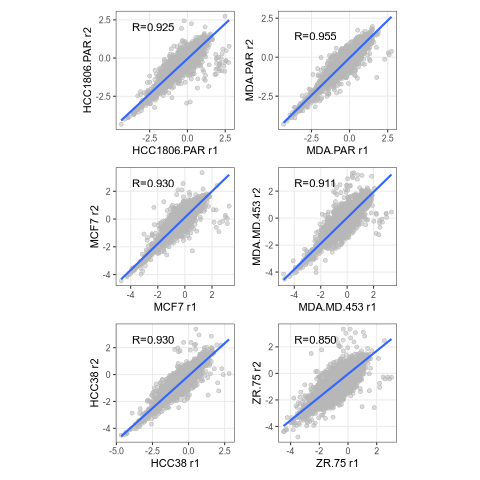

In [30]:
%%R
library(ggplot2)
library(dplyr)
library(ggrastr)
library(patchwork)

# Draw scatter plots for replicates
scatter_plots <- list()
types <- unique(gsub("\\.\\d+$", "", colnames(stab.df)))

for (type in types){
    # Select columns for this cell type
    type.df <- as.data.frame(stab.df %>% select(contains(type)))
    
    # Skip if there aren't exactly 2 replicates
    if(ncol(type.df) != 2) {
        next
    }
    
    # Remove rows with values smaller than -5
    tmp <- type.df %>% filter(!apply(., 1, function(x) any(x < -5)))
    
    # Get column names for proper referencing
    col1_name <- colnames(tmp)[1]
    col2_name <- colnames(tmp)[2]
    
    # Calculate correlation
    s <- cor.test(tmp[,1], tmp[,2])
    stat <- sprintf("R=%.3f", s$estimate)
    
    # Create scatter plot with proper column referencing
    scatter_plots[[type]] <- ggplot(tmp, aes_string(x = col1_name, y = col2_name)) + 
        geom_point_rast(color = "#B7B7B7", alpha = 0.5) +
        geom_smooth(method = lm, level = 0.99, linewidth = 1) +  # Use linewidth instead of size
        xlab(paste0(type, " r1")) + 
        ylab(paste0(type, " r2")) +
        # Position annotation based on actual data range
        annotate("text", 
                 x = min(tmp[,1]) + 0.1 * diff(range(tmp[,1])), 
                 y = max(tmp[,2]) - 0.1 * diff(range(tmp[,2])), 
                 label = stat, size = 4, hjust = 0) +
        theme_bw() + 
        theme(legend.position = "none", 
              panel.grid.minor = element_blank(), 
              aspect.ratio = 1)
}

# Check if we have any plots
if(length(scatter_plots) == 0) {
    cat("No cell types with exactly 2 replicates found.\n")
} else {
    # Merge list of plots
    plt <- wrap_plots(scatter_plots, ncol = 2)
    
    # Save the plot
    ggsave(filename = "results/stab.df_scatter.pdf", 
           plot = plt, 
           device = "pdf",
           width = 8,
           height = 4 * ceiling(length(scatter_plots)/2))
    
    # Display the plot
    print(plt)
    
    cat("Scatter plots saved to results/stab.df_scatter.pdf\n")
    cat(sprintf("Created %d scatter plots for replicate comparisons\n", length(scatter_plots)))
}

# Print correlation summary
cat("\n========================================\n")
cat("REPLICATE CORRELATION SUMMARY\n")
cat("========================================\n\n")

for (type in names(scatter_plots)){
    type.df <- as.data.frame(stab.df %>% select(contains(type)))
    if(ncol(type.df) == 2) {
        cor_val <- cor(type.df[,1], type.df[,2])
        cat(sprintf("%-15s: R = %.4f\n", type, cor_val))
    }
}

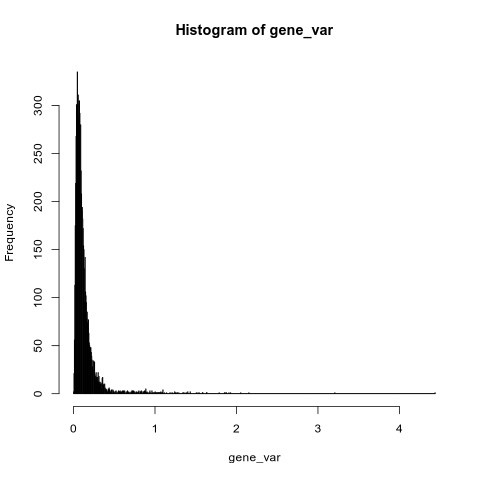

In [39]:
%%R
library(genefilter)
gene_var <- rowVars(stab.df)

hist(gene_var, breaks=1000)

In [43]:
%%R
head(stab.df)

# A tibble: 6 × 12
  HCC1806.PAR.1 HCC1806.PAR.2 MDA.PAR.1 MDA.PAR.2 MCF7.1 MCF7.2 MDA.MD.453.1
          <dbl>         <dbl>     <dbl>     <dbl>  <dbl>  <dbl>        <dbl>
1        -1.07        -1.28     -0.286   -0.640   -0.326 -0.665      -0.720 
2        -0.125       -0.0582    0.0451  -0.00553 -0.377 -0.221       0.0638
3        -0.171       -0.180     0.0741  -0.00402  0.108  0.336       0.954 
4        -0.401       -0.165     0.289   -0.0617  -0.661 -0.556      -0.430 
5        -1.05        -0.948    -0.743   -0.722   -0.452 -0.670      -0.605 
6        -1.13        -0.768    -0.898   -1.14    -0.714 -1.26       -1.36  
# ℹ 5 more variables: MDA.MD.453.2 <dbl>, HCC38.1 <dbl>, HCC38.2 <dbl>,
#   ZR.75.1 <dbl>, ZR.75.2 <dbl>


In [44]:
%%R
#library(genefilter)

# Convert tibble to data frame for easier handling
stab.df <- as.data.frame(stab.df)

# Calculate row variances
gene_var <- rowVars(as.matrix(stab.df))

# Sort by variance and get top 1000 row indices
sorted_indices <- order(gene_var, decreasing = TRUE)[1:1000]

# Create subset with top 1000 most variable rows
stab.df.hvg <- stab.df[sorted_indices, ]

# Calculate statistics
total_variance <- sum(gene_var)
variance_top_1000 <- sum(gene_var[sorted_indices])
percent_explained <- (variance_top_1000 / total_variance) * 100

cat("========================================\n")
cat("TOP 1000 MOST VARIABLE ROWS SELECTED\n")
cat("========================================\n\n")
cat(sprintf("Total rows: %d\n", nrow(stab.df)))
cat(sprintf("Selected: 1000 rows\n"))
cat(sprintf("Percentage of variance explained: %.2f%%\n", percent_explained))
cat(sprintf("Max variance: %.4f\n", max(gene_var)))
cat(sprintf("Min variance in top 1000: %.4f\n", gene_var[sorted_indices[1000]]))
cat(sprintf("\nSubset dimensions: %d rows x %d samples\n", 
            nrow(stab.df.hvg), ncol(stab.df.hvg)))

# Create scaled data for downstream analysis
log_data <- log2(abs(stab.df.hvg) + 1e-10)  # abs() to handle negative values
scaled_data <- t(scale(t(log_data)))

cat("\nData prepared for analysis:\n")
cat("- stab.df.hvg: subset with top 1000 variable rows\n")
cat("- scaled_data: log2-transformed and z-score normalized\n")

# Save the row indices for reference
write.table(sorted_indices, 
            file = "top_1000_row_indices.txt", 
            quote = FALSE, 
            row.names = FALSE, 
            col.names = FALSE)
cat("\nRow indices saved to 'top_1000_row_indices.txt'\n")

# Quick data check
cat("\n========================================\n")
cat("DATA SUMMARY\n")
cat("========================================\n")
cat("Original data range: [", round(min(stab.df), 2), ",", round(max(stab.df), 2), "]\n")
cat("HVG subset range: [", round(min(stab.df.hvg), 2), ",", round(max(stab.df.hvg), 2), "]\n")
cat("Scaled data range: [", round(min(scaled_data, na.rm=TRUE), 2), ",", 
    round(max(scaled_data, na.rm=TRUE), 2), "]\n")

TOP 1000 MOST VARIABLE ROWS SELECTED

Total rows: 7863
Selected: 1000 rows
Percentage of variance explained: 40.80%
Max variance: 4.4360
Min variance in top 1000: 0.2034

Subset dimensions: 1000 rows x 12 samples

Data prepared for analysis:
- stab.df.hvg: subset with top 1000 variable rows
- scaled_data: log2-transformed and z-score normalized

Row indices saved to 'top_1000_row_indices.txt'

DATA SUMMARY
Original data range: [ -4.82 , 3.38 ]
HVG subset range: [ -4.82 , 3.38 ]
Scaled data range: [ -3.16 , 2.82 ]


In [45]:
%%R
#z-score normalize by row
stab.df.hv.z <- t(apply(stab.df.hvg, 1, function(x) (x - mean(x))/sd(x)))

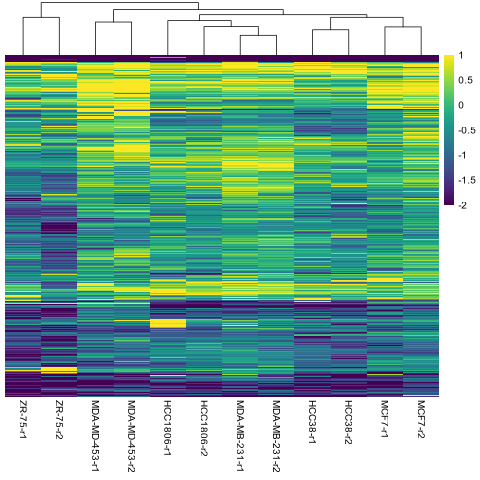

In [46]:
%%R
library(pheatmap)
library(RColorBrewer)
library(viridis)

colnames(stab.df.hvg) <- gsub("MDA-PAR", "MDA-MB-231", gsub("HCC1806-PAR", "HCC1806", gsub("-(\\d)$", "-r\\1", gsub("\\.", "-", colnames(stab.df.hvg)))))

breaksList = seq(-2, 1, by = 0.05)
pheatmap(stab.df.hvg,
         color=viridis(length(breaksList)-1),
         breaks = breaksList,
         show_rownames = FALSE,
         treeheight_row = 0,
         border_color=NA)


In [47]:
%%R 
dim(stab.df.hvg)

[1] 1000   12


png 
  2 


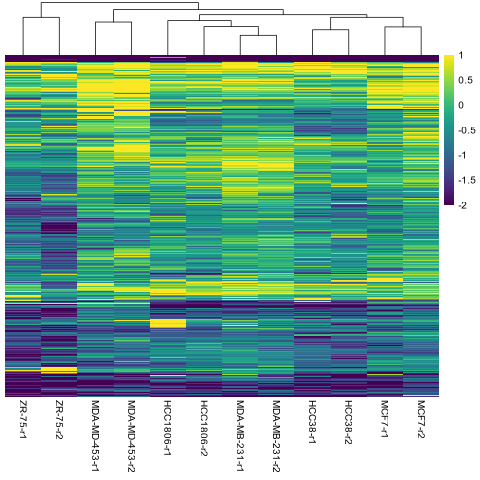

In [48]:
%%R
xx <- pheatmap(stab.df.hvg,
               color=viridis(length(breaksList)-1),
               breaks = breaksList,
               show_rownames = FALSE,
               treeheight_row = 0,
               border_color=NA)

pdf("results/stability_heatmap.pdf", width=3, height=5)
grid::grid.newpage()
grid::grid.draw(xx$gtable)
dev.off()

In [215]:
%%R



 [1] "HCC1806-r1"    "HCC1806-r2"    "MDA-MB-231-r1" "MDA-MB-231-r2"
 [5] "MCF7-r1"       "MCF7-r2"       "MDA-MD-453-r1" "MDA-MD-453-r2"
 [9] "HCC38-r1"      "HCC38-r2"      "ZR-75-r1"      "ZR-75-r2"     


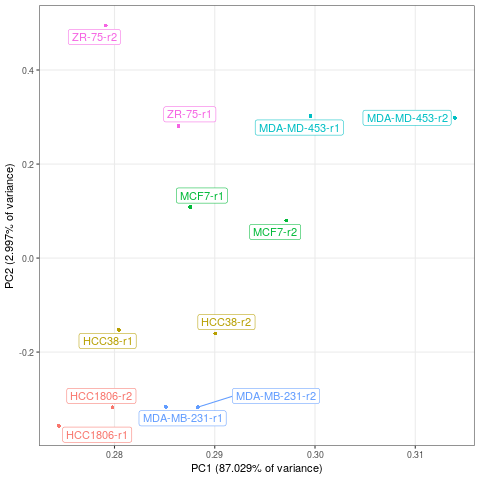

In [216]:
%%R
#perform pca and plot
pca <- prcomp(stab.df, center = T, scale. = F)

library(ggrepel)
#plot pca
rotation.pca <- as.data.frame(pca$rotation)
rotation.pca["type"] <- gsub("\\.\\d+", "", rownames(rotation.pca))
rownames(rotation.pca) <- gsub("MDA-PAR", "MDA-MB-231", gsub("HCC1806-PAR", "HCC1806", gsub("-(\\d)$", "-r\\1", gsub("\\.", "-", rownames(rotation.pca)))))
var.pca <- summary(pca)$importance[2,]
plt <- ggplot(rotation.pca, aes(PC1, PC2, color=type)) + geom_point(shape = 16) +
geom_label_repel(aes(label=rownames(rotation.pca))) +
xlab(paste0("PC1 (", var.pca[1]*100,"% of variance)")) +
ylab(paste0("PC2 (", var.pca[2]*100,"% of variance)")) +
theme_bw() + theme(legend.position="none", panel.grid.minor = element_blank())
ggsave("results/stab_df_pca.pdf", width=4, height=4)
plt

### History plots

In [305]:
train_list = []
val_list = []
step = 0
with open("models/history.log") as f:
    for line in f:
        a = line.rstrip().split("\t")    
        stype, d1, loss = a[0].split(": ")
        d2, R = a[1].split(": ")
        if stype=="Train":
            train_list.append({"step": step, "loss": float(loss), "R": float(R)})
            step += 1
        else:
            val_list.append({"step": step, "loss": float(loss), "R": float(R)})

In [306]:
import pandas as pd
train_df = pd.DataFrame(train_list)
train_df.head()

,step,loss,R
0,0,44.796658,0.276482
1,1,36.566643,0.127393
2,2,32.135712,-0.255836
3,3,20.370953,0.198482
4,4,11.440815,0.280303


In [307]:
#collect every 1838th row
#train_df_f = pd.concat([train_df.iloc[::1838, :], train_df.iloc[1::1838, :], train_df.iloc[2::1838, :]], ignore_index=True).sort_values(by="step")
train_df_f = train_df.iloc[0::1838, :]
train_df_f.head()

,step,loss,R
0,0,44.796658,0.276482
1838,1838,81.359352,0.117773
3676,3676,22.666243,0.017477
5514,5514,15.050385,0.123296
7352,7352,11.250436,0.393565


In [308]:
#average every 1838 rows
train_df_f = train_df.groupby(np.arange(len(train_df))//230).mean()
train_df_f.head()

,step,loss,R
0,114.5,27.326660,0.226192
1,344.5,28.097804,0.251477
2,574.5,26.627155,0.239743
3,804.5,29.512265,0.238209
4,1034.5,26.429487,0.246760


/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


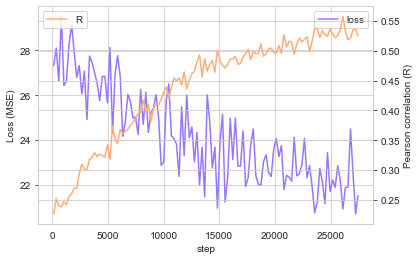

In [309]:
#plot loss and R on one line graph with step as x and two y-axes
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
fig, ax1 = plt.subplots()
ax1.plot(train_df_f["step"], train_df_f["loss"], color='#9776FF')
ax1.set_xlabel("step")
ax1.set(ylabel='Loss (MSE)')
ax1.legend(labels=["loss"])
ax2 = ax1.twinx()
ax2.plot(train_df_f["step"], train_df_f["R"], color='#FFAD76')
ax2.set(xlabel='Epochs', ylabel='Pearson correlation (R)')
ax2.legend(labels=["R"])
plt.savefig("results/history_train.pdf")
plt.show()

In [287]:
valid_df = pd.DataFrame(val_list)
valid_df.head()

,step,loss,R
0,1838,0.814338,0.392161
1,3676,0.804377,0.423977
2,5514,0.742358,0.492551
3,7352,0.716362,0.512952
4,9190,0.720951,0.478399


/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


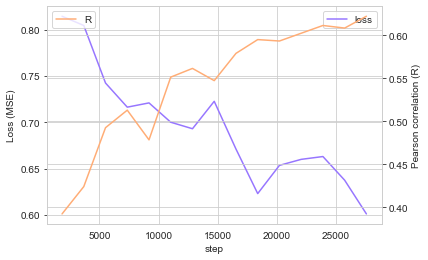

In [288]:
fig, ax1 = plt.subplots()
ax1.plot(valid_df["step"], valid_df["loss"], color='#9776FF')
ax1.set_xlabel("step")
ax1.set(ylabel='Loss (MSE)')
ax1.legend(labels=["loss"])
ax2 = ax1.twinx()
ax2.plot(valid_df["step"], valid_df["R"], color='#FFAD76')
ax2.set(xlabel='Epochs', ylabel='Pearson correlation (R)')
ax2.legend(labels=["R"])
plt.savefig("results/history_valid.pdf")
plt.show()

## RBMS3 regulon

In [51]:
import pandas as pd
import numpy as np
exp_df = pd.read_csv('data/BRCA_SLAM_gs_TPM.selected.txt', sep="\t", index_col=0)
exp_df = exp_df.loc[exp_df.sum(axis=1)>10,]
exp_df = np.log10(exp_df + 1e-6)
exp_df.head()


,HCC1806-PAR-1,HCC1806-PAR-2,MDA-PAR-1,MDA-PAR-2,MCF7-1,MCF7-2,MDA-MD-453-1,MDA-MD-453-2,HCC38-1,HCC38-2,ZR-75-1,ZR-75-2
GENE,,,,,,,,,,,,
A1BG,1.352520,1.353212,0.561130,0.562999,0.438121,0.391722,1.158195,1.280572,0.825173,0.981491,1.248863,1.125386
AAAS,0.044358,0.164927,-0.085645,0.240688,-0.012887,-0.054587,-0.066918,0.145048,0.192854,0.280589,0.208969,0.062319
AACS,0.534145,0.616855,0.526016,0.569601,0.758398,0.710714,0.553772,0.592084,0.680561,0.741635,0.840785,0.935845
AAED1,0.596877,0.662339,0.660540,0.688598,0.526909,0.441211,-0.068981,0.124260,0.355065,0.561544,0.290039,0.315982
AAGAB,0.623690,0.753050,0.475499,0.563754,0.956415,1.058104,1.041304,1.141294,0.740448,1.019033,1.213546,0.765552


In [52]:
import re
decay_df = pd.read_csv('data/BRCA-lines_log10_decay_rates_gs.txt', sep="\t", index_col=0)
decay_df.columns = [re.sub("\.", "-", x) for x in decay_df.columns]
decay_df.head()


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/avicenna/tmp/ipykernel_21540/12525755.py:3: SyntaxWarning: invalid escape sequence '\.'
  decay_df.columns = [re.sub("\.", "-", x) for x in decay_df.columns]


,HCC1806-PAR-1,HCC1806-PAR-2,MDA-PAR-1,MDA-PAR-2,MCF7-1,MCF7-2,MDA-MD-453-1,MDA-MD-453-2,HCC38-1,HCC38-2,ZR-75-1,ZR-75-2
A1BG,-1.066082,-1.280269,-0.285732,-0.639637,-0.326187,-0.664953,-0.719758,-0.812882,-1.439074,-0.731446,-1.717306,-1.054118
AACS,-0.125061,-0.058180,0.045117,-0.005526,-0.376835,-0.221019,0.063778,-0.058493,-0.308672,-0.569838,-0.351516,-0.318399
AAED1,-0.171404,-0.180253,0.074135,-0.004023,0.107655,0.336408,0.954444,0.670258,0.320970,-0.151047,0.191012,-0.197516
AAGAB,-0.400829,-0.165416,0.289347,-0.061730,-0.661292,-0.556470,-0.429905,-0.536963,-0.429548,-0.822612,-1.262680,-0.806532
AAK1,-1.045263,-0.947986,-0.742636,-0.721529,-0.451813,-0.670308,-0.605175,-0.498851,-0.723403,-0.852025,-0.914979,-0.630247


In [53]:
motif_map_df = pd.read_csv('results/motifs_target_map_df.txt', sep="\t", index_col=0)
motif_map_df.head()

,[CT][AG]CCTGTA.,.[AGT][AT]ATA[AT]A.,CC[AG][CT]C[AGT]CC.,[ACG]TACT[AT][AC][AC][AGT],[CGT]CTAC[GT][AT]C.,.CTACAGC.,.C[AG]AGTAC.
AACS,0,1,1,0,0,0,1
AAED1,0,1,1,0,0,0,0
AAGAB,0,1,0,0,0,0,0
AAMP,0,1,1,0,0,0,0
AAR2,0,0,0,0,0,0,1


In [54]:
reg = motif_map_df.loc[motif_map_df.iloc[:,1]==1,].index.tolist()
len(reg)

3716

In [55]:
#write index to file
with open("results/rbms3_reg.list", "w") as f:
    for item in reg:
        f.write("%s\n" % item)

In [56]:
!wc -l results/rbms3_reg.list

3716 results/rbms3_reg.list


In [57]:
rbms3_exp = exp_df.loc['RBMS3',:]
rbms3_exp.head()

HCC1806-PAR-1   -0.170677
HCC1806-PAR-2   -0.269671
MDA-PAR-1        0.550033
MDA-PAR-2        0.619626
MCF7-1          -0.309269
Name: RBMS3, dtype: float64

In [58]:
rbms3_reg = decay_df.loc[reg,:]
rbms3_reg.head()

,HCC1806-PAR-1,HCC1806-PAR-2,MDA-PAR-1,MDA-PAR-2,MCF7-1,MCF7-2,MDA-MD-453-1,MDA-MD-453-2,HCC38-1,HCC38-2,ZR-75-1,ZR-75-2
AACS,-0.125061,-0.058180,0.045117,-0.005526,-0.376835,-0.221019,0.063778,-0.058493,-0.308672,-0.569838,-0.351516,-0.318399
AAED1,-0.171404,-0.180253,0.074135,-0.004023,0.107655,0.336408,0.954444,0.670258,0.320970,-0.151047,0.191012,-0.197516
AAGAB,-0.400829,-0.165416,0.289347,-0.061730,-0.661292,-0.556470,-0.429905,-0.536963,-0.429548,-0.822612,-1.262680,-0.806532
AAMP,-0.435579,-0.534002,-0.044362,-0.609693,-0.886699,-0.779945,-0.725224,-0.871497,-0.810407,-1.050993,-1.003387,-0.401101
AARS,-0.529373,-0.486518,-0.361084,-0.259079,-0.475877,-0.494141,-0.443035,-0.502165,-0.396586,-0.494496,-0.749820,-0.839130


In [59]:
rbms3_reg = rbms3_reg.loc[:,rbms3_reg.columns.isin(rbms3_exp.index)]

In [60]:
rbms3_reg.shape

(3716, 12)

In [356]:
from scipy.stats import spearmanr

corr_list = []
for i in range(rbms3_reg.shape[0]):
    #corr_list.append(np.corrcoef(rbms3_reg.iloc[i,:], rbms3_exp)[0,1])
    corr_list.append(spearmanr(rbms3_reg.iloc[i,:], rbms3_exp)[0])

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from matplotlib.backends.backend_pdf import PdfPages

median_value = np.median(corr_list)
stat, p_value = wilcoxon(corr_list)
median_value, p_value

(-0.1958041958041958, 6.233921341809681e-163)

/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/avicenna/hani/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


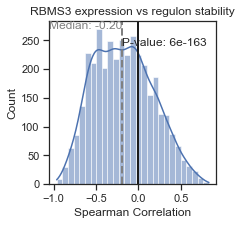

In [374]:
sns.set(style="ticks")  # Set the background to white
plt.figure(figsize=(3, 3))
sns.histplot(corr_list, kde=True)  # Create histogram
plt.axvline(median_value, color='grey', linestyle='dashed', linewidth=2)  # Median line
plt.axvline(x=0, color='k', linestyle='-', lw=2)
plt.grid(visible=False)  # Show only x-axis grid
plt.tick_params(axis='both', which='major', length=6)

plt.text(median_value, plt.ylim()[1]*0.95, f'Median: {median_value:.2f}',
         horizontalalignment='right', color='grey')
plt.text(median_value, plt.ylim()[1]*0.85, f'P-value: {p_value:.0e}')
plt.title('RBMS3 expression vs regulon stability')
#x-axis label
plt.xlabel('Spearman Correlation')
#y-axis label
plt.ylabel('Count')
plt.savefig("results/rbms3_reg_stab_corr.pdf", width=4, height=4)

(array([ 3.,  3.,  2.,  6.,  8.,  7.,  4.,  8., 14., 14., 11., 20., 19.,
        25., 32., 31., 37., 28., 35., 42., 41., 47., 46., 57., 47., 60.,
        61., 65., 59., 58., 59., 65., 57., 65., 64., 69., 69., 78., 55.,
        82., 63., 59., 77., 69., 66., 76., 64., 72., 69., 58., 60., 67.,
        70., 56., 63., 71., 59., 66., 62., 60., 50., 45., 53., 49., 42.,
        38., 37., 37., 39., 37., 32., 28., 25., 31., 25., 23., 25., 26.,
        21., 28., 29., 17., 11., 16., 14., 10.,  9.,  6., 10.,  9.,  5.,
         5.,  5.,  3.,  7.,  2.,  3.,  1.,  0.,  3.]),
 array([-9.16276538e-01, -8.98660750e-01, -8.81044961e-01, -8.63429173e-01,
        -8.45813384e-01, -8.28197596e-01, -8.10581807e-01, -7.92966019e-01,
        -7.75350230e-01, -7.57734441e-01, -7.40118653e-01, -7.22502864e-01,
        -7.04887076e-01, -6.87271287e-01, -6.69655499e-01, -6.52039710e-01,
        -6.34423922e-01, -6.16808133e-01, -5.99192345e-01, -5.81576556e-01,
        -5.63960768e-01, -5.46344979e-01, -5.28729190e

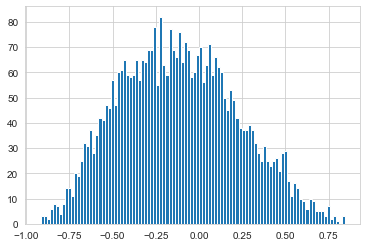

In [353]:
#histogram of correlations
plt.hist(corr_list, bins=100)

In [354]:
#statistic
np.mean(corr_list), np.median(corr_list), np.std(corr_list)

(-0.1169762327256241, -0.13111634560867452, 0.340202938032884)

In [383]:
rbms3_reg_z = rbms3_reg.apply(lambda x: (x - np.mean(x))/np.std(x), axis=1)
rbms3_reg_z.head()

,HCC1806-PAR-1,HCC1806-PAR-2,MDA-PAR-1,MDA-PAR-2,MCF7-1,MCF7-2,MDA-MD-453-1,MDA-MD-453-2,HCC38-1,HCC38-2,ZR-75-1,ZR-75-2
AACS,0.345339,0.698895,1.244964,0.977245,-0.985634,-0.161934,1.343610,0.697243,-0.625299,-2.005921,-0.851787,-0.676721
AAED1,-0.965190,-0.990765,-0.255544,-0.481434,-0.158664,0.502469,2.288692,1.467348,0.457851,-0.906356,0.082250,-1.040657
AAGAB,0.225458,0.841020,2.030143,1.112141,-0.455605,-0.181513,0.149430,-0.130507,0.150365,-0.877427,-2.028123,-0.835381
AAMP,0.881339,0.525581,2.295427,0.251991,-0.749273,-0.363403,-0.165607,-0.694326,-0.473510,-1.343128,-1.171054,1.005964
AARS,-0.178325,0.107210,0.942950,1.622591,0.178108,0.056416,0.396928,0.002957,0.706409,0.054052,-1.647119,-2.242176


In [458]:
rbms3_reg_z_mean = rbms3_reg_z.mean(axis=0)
#rbms3_reg_z_mean = rbms3_reg.loc['SCOC',:]
rbms3_reg_z_mean.head()

HCC1806-PAR-1   -0.157300
HCC1806-PAR-2   -0.155204
MDA-PAR-1        0.380021
MDA-PAR-2        0.246399
MCF7-1           0.120447
dtype: float64

In [459]:
spearmanr(rbms3_reg_z_mean, rbms3_exp)

SpearmanrResult(correlation=-0.46153846153846156, pvalue=0.13094806950717278)

In [460]:
from scipy.stats import pearsonr

pearsonr(rbms3_reg_z_mean, rbms3_exp)[0]

-0.25125704289363465

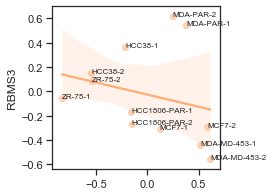

In [461]:
#lmplot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")  # Set the background to white
plt.figure(figsize=(3, 3))
sns.regplot(x=rbms3_reg_z_mean, y=rbms3_exp, scatter_kws={"color": "#FFAD76", "alpha": 0.5}, line_kws={"color": "#FFAD76"})
#plt.axvline(x=0, color='k', linestyle='-', lw=2)
#plt.axhline(y=0, color='k', linestyle='-', lw=2)
plt.grid(visible=False)  # Show only x-axis grid
plt.tick_params(axis='both', which='major', length=6)

#label individual points
for i in range(len(rbms3_reg_z_mean)):
    plt.text(rbms3_reg_z_mean[i], rbms3_exp[i], rbms3_reg_z_mean.index[i], fontsize=8)

